<a href="https://colab.research.google.com/github/onepunchgin/ASR-Model/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydub

In [ ]:
!pip install numpy

In [ ]:
!pip install nemo-toolkit[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 k

In [ ]:
!pip install nemo_asr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 10.6 MB/s eta 0:00:00


In [ ]:
!pip install torch

In [ ]:
import pydub
import numpy as np
import torch
import nemo.collections.asr as nemo_asr
model = nemo_asr.models.ASRModel.from_pretrained("ai4bharat/MahaDhwani_pretrained_conformer")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.freeze() # inference mode
model = model.to(device) # transfer model to device

MahaDhwani_pretrained_conformer.nemo:   0%|          | 0.00/647M [00:00<?, ?B/s]

[NeMo W 2025-06-01 02:47:11 nemo_logging:405] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath:
    - /nlsasfs/home/ai4bharat/ai4bharat-pr/speechteam/indicasr_v3/manifests/nemo/pretraining_v2/combined/assamese_train.json
    - /nlsasfs/home/ai4bharat/ai4bharat-pr/speechteam/indicasr_v3/manifests/nemo/pretraining_v2/combined/balti_train.json
    - /nlsasfs/home/ai4bharat/ai4bharat-pr/speechteam/indicasr_v3/manifests/nemo/pretraining_v2/combined/bengali_train.json
    - /nlsasfs/home/ai4bharat/ai4bharat-pr/speechteam/indicasr_v3/manifests/nemo/pretraining_v2/combined/bhojpuri_train.json
    - /nlsasfs/home/ai4bharat/ai4bharat-pr/speechteam/indicasr_v3/manifests/nemo/pretraining_v2/combined/bhutia_train.json
    - /nlsasfs/home/ai4bharat/ai4bharat-pr/speechteam/indicasr_v3/manifests/nemo/pretraining_v2/combined/bodo_train.json
  

[NeMo I 2025-06-01 02:47:11 nemo_logging:393] PADDING: 16
[NeMo I 2025-06-01 02:47:14 nemo_logging:393] Model SpeechEncDecSelfSupervisedModel was successfully restored from /root/.cache/huggingface/hub/models--ai4bharat--MahaDhwani_pretrained_conformer/snapshots/8b61c2a9c023cef8becfcce3105a22b94d15d681/MahaDhwani_pretrained_conformer.nemo.


In [ ]:
wavpath = 'sample.wav'
wav = pydub.AudioSegment.from_file(wavpath).set_frame_rate(16000).set_channels(1)
sarray = wav.get_array_of_samples()
fp_arr = np.array(sarray).T.astype(np.float64)
fp_arr = fp_arr.reshape((1,-1))
feature = torch.from_numpy(fp_arr).float().to(device='cuda')
length=torch.tensor([fp_arr.shape[1]]).to(device='cuda')
spectrograms, spec_masks, encoded, encoded_len = model(input_signal=feature,input_signal_length=length)

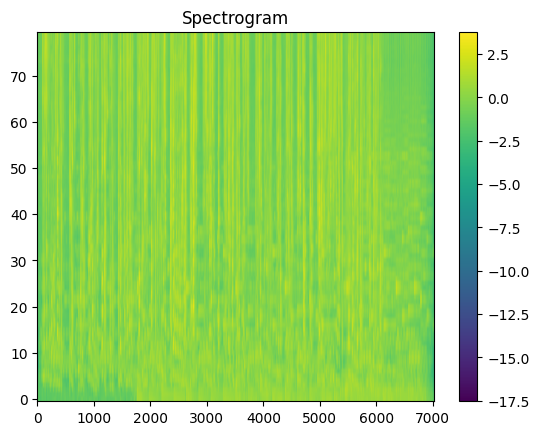

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Example: visualize the first spectrogram (if spectrograms is a tensor)
spec_np = spectrograms.detach().cpu().numpy()[0] # Convert to numpy and take␣ first example
plt.imshow(spec_np, aspect='auto', origin='lower')
plt.colorbar()
plt.title('Spectrogram')
plt.show()

In [ ]:
print(encoded.shape)
print(encoded) # or just some stats
print("Encoded feature mean:", encoded.mean().item())

torch.Size([1, 512, 1756])
tensor([[[ 0.5646,  0.3355,  0.2306,  ...,  1.0747,  0.8706,  1.2151],
         [-0.5155, -0.2364, -0.3340,  ..., -0.1808, -0.2165, -0.0527],
         [-0.3431, -0.2936, -0.2988,  ..., -0.0272, -0.0650,  0.1738],
         ...,
         [-0.3589,  0.1961,  0.1229,  ..., -0.0209, -0.3758, -1.2915],
         [ 0.5980,  0.3804,  0.4534,  ...,  0.7703,  1.0343,  1.6440],
         [-0.4651,  0.1761,  0.1682,  ..., -0.8048, -0.4462,  0.4438]]],
       device='cuda:0')
Encoded feature mean: -0.016249801963567734


In [ ]:
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
import torch
import torchaudio
model_name = "facebook/wav2vec2-base-960h"
processor = Wav2Vec2Processor.from_pretrained(model_name)
model = Wav2Vec2ForCTC.from_pretrained(model_name).to('cuda')
model.eval()
wav_path = "sample.wav"
waveform, sample_rate = torchaudio.load(wav_path)
if sample_rate != 16000:
  resampler = torchaudio.transforms.Resample(sample_rate, 16000)
  waveform = resampler(waveform)
if waveform.shape[0] > 1:
  waveform = torch.mean(waveform, dim=0, keepdim=True)

inputs = processor(waveform.squeeze().numpy(), sampling_rate=16000,return_tensors="pt", padding=True)
input_values = inputs.input_values.to('cuda')

with torch.no_grad():
  logits = model(input_values).logits

pred_ids = torch.argmax(logits, dim=-1)
transcription = processor.batch_decode(pred_ids)[0]



Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
print("Transcription:", transcription)

Transcription: SOME OF THE MOST SUCCESSFUL PEOPLE IN THE WORLD ARE THE ONES WHO'VE HAD THE MOST FAILURES J KY ROWLINGS O WROTE HARRY POTTE HER FIRST HARRY POTTOF BOOK WAS REJECTED TWELVE TIMES BEFORE WAS FINALLY PUBLISHED MICHAEL JEORDAN WAS CUT FROM HIS HIGH SCHOOL BASKETVALTING HE LOST HUNDEREDS OF GAINS AND MIS THOUSANDS OF SHOTS DURING HIS CAUEER BUT HE ONCE SAID I HAVE FAILED OVER AND OVER AND OVER AGAIN IN MY LIFE AND THAT'S WHY I SUCCEED HESE PEOPLE SUCCEEDED BECAUSE THEY UNDERSTOOD THAT YE CAN'T LET YOUR FAILUR'S TO FIND YOU WHOU HAVE TO LEND WER FAILURES TEACHING YET TO LET THEM SHOW YOU WHAT TO DO DIFFERENTLY THE NEXT TIME SO IF YOU GET INTO TROUBLE AT DOESN'T MEAN YOUR TROUBLE MAKER IT MEANS YOU NEEDN'T TO TRY HARDER AG GRIGHT IF YOU GET A BAD GRAVE THAT DOESN'T MEAN YOUR STUPID AT JUST MEANS YOU NEED TO SPEND MORE TIME STUDY NO ONE'S BORN BEING GOOD AN OL THINGS YOU NEED ON GOOD AT THINGS THROUGH HARD WORKMN
